In [1]:
# Q5
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Opens a image in RGB mode 
im = cv2.imread("AUT-DIP.png",0) 
  
height ,width = np.shape(im) 
  
a = im[ 4:500 ,5:500] 

u = im[ 4:500 ,500:1000] 

t =  im[ 4:500 ,1000:1500] 

d =  im[500:1000,5:500 ] 

i =  im[ 500:1000 , 500:1000] 

p =  im[500:1000 , 1000:1500]  

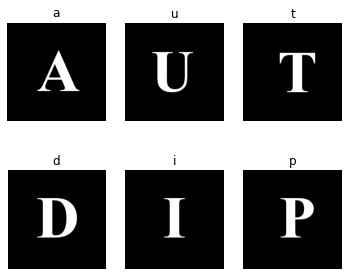

In [4]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].imshow(a, cmap="gray");axs[0, 0].set_title('a');axs[0, 0].axis('off')
axs[0, 1].imshow(u, cmap="gray");axs[0, 1].set_title('u');axs[0, 1].axis('off')
axs[0, 2].imshow(t, cmap="gray");axs[0, 2].set_title('t');axs[0, 2].axis('off')
axs[1, 0].imshow(d, cmap="gray");axs[1, 0].set_title('d');axs[1, 0].axis('off')
axs[1, 1].imshow(i, cmap="gray");axs[1, 1].set_title('i');axs[1, 1].axis('off')
axs[1, 2].imshow(p, cmap="gray");axs[1, 2].set_title('p');axs[1, 2].axis('off')


plt.subplots_adjust(bottom = 0.025 , hspace =0.5)

In [22]:
# a )---------------------------------------------------------
width = int(a.shape[1] * 2)
height = int(a.shape[0] * 2)
dim = (width, height)
  
# resize image
resized = cv2.resize(a, dim, interpolation = cv2.INTER_AREA)

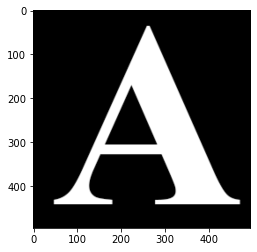

In [23]:
second_a = resized[250:746 , 255:750]
plt.imshow(second_a , cmap = 'gray');plt.title('zoomed A')

shape of zoomed A : (496, 495)
shape of  A : (496, 495)


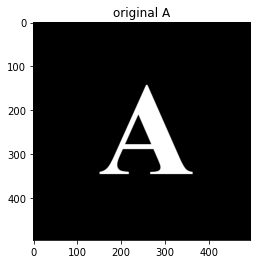

In [24]:
plt.imshow(a, cmap="gray");plt.title('original A')
print('shape of zoomed A : ' +str(second_a.shape))
print('shape of  A : ' +str(a.shape))

Text(0.5, 1.0, 'second U')

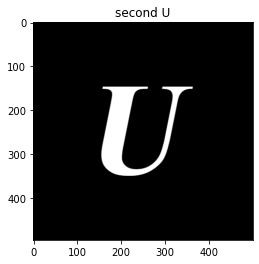

In [27]:
# u ) --------------------------------------------------------------------
H, W = u.shape
M2 = np.float32([[1, -0.2, 0], [0, 1, 0]])
M2[0,2] = -M2[0,1] * W/2
M2[1,2] = -M2[1,0] * H/2
second_u = cv2.warpAffine(u, M2, (W, H))

plt.imshow(second_u, cmap="gray");plt.title('second U')

Text(0.5, 1.0, 'original T')

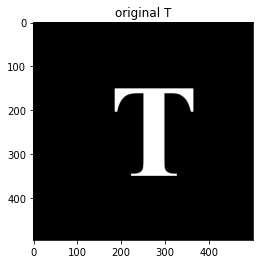

In [28]:
# t )-------------------------------------------------------------------
T = np.float32([[1, 0, -80], [0, 1, 100]]) 
  
# We use warpAffine to transform 
# the image using the matrix, T 
height, width = t.shape[:2] 
second_t = cv2.warpAffine(t, T, (width, height)) 

plt.imshow(t, cmap="gray");plt.title('original T')

Text(0.5, 1.0, 'second T')

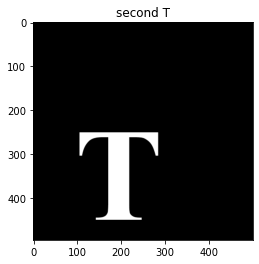

In [30]:
plt.imshow(second_t, cmap="gray");plt.title('second T')

Text(0.5, 1.0, 'original D')

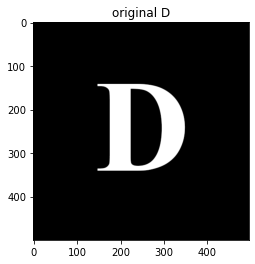

In [38]:
# d )-------------------------------------------------------------------
D = np.float32([[0.906, -0.422, 0], [0.422, 0.906, 100]])  # cos(25) = 0.906  sin(25)= 0.422
  
# We use warpAffine to transform 
# the image using the matrix, T 
height, width = d.shape[:2] 
second_d = cv2.warpAffine(d, D, (width, height)) 

plt.imshow(d, cmap="gray");plt.title('original D')

Text(0.5, 1.0, 'second D')

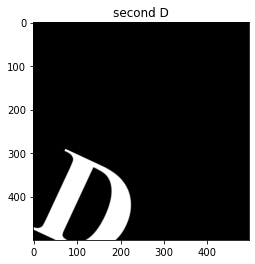

In [39]:
plt.imshow(second_d, cmap="gray");plt.title('second D')

Text(0.5, 1.0, 'second I')

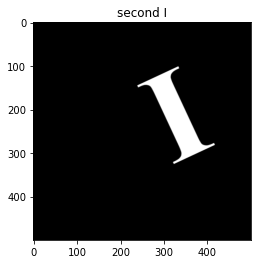

In [40]:
# i )-------------------------------------------------------------------
I = np.float32([[0.906, 0.422, 0], [-0.422, 0.906, 100]])  # cos(-25) = 0.906  sin(-25)= -0.422
  
# We use warpAffine to transform 
# the image using the matrix, T 
height, width = i.shape[:2] 
second_i = cv2.warpAffine(i, I, (width, height)) 

plt.imshow(i, cmap="gray");plt.title('original I')

Text(0.5, 1.0, 'original I')

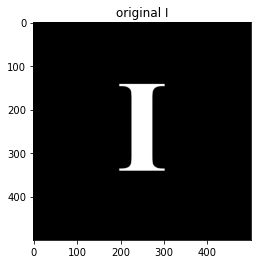

In [41]:
plt.imshow(second_i, cmap="gray");plt.title('second I')

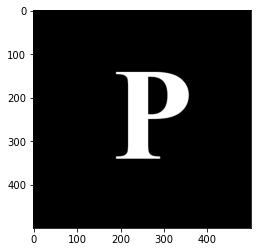

In [42]:
# p ) -------------------------------------------------------------
h, w = p.shape[:2]
center = (w / 2, h / 2)

M = cv2.getRotationMatrix2D(center, angle = 45, scale = 1 )
second_p = cv2.warpAffine(p, M, (w, h))
plt.imshow(p, cmap="gray")

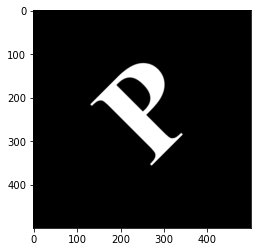

In [43]:
plt.imshow(second_p, cmap="gray")

Text(0.5, 1.0, ' concatenated image ')

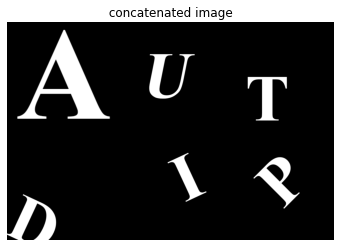

In [44]:
aut = np.concatenate((second_a, second_u , second_t), axis=1)
dip = np.concatenate((second_d, second_i , second_p), axis=1)
autdip = np.concatenate((aut , dip), axis=0)
plt.imshow(autdip , cmap= 'gray')
plt.axis('off')
plt.title(' concatenated image ')